Example 2.9375
==============

This notebook is available on github
[here](https://github.com/aezarebski/aas-extended-examples). If you find
errors or would like to suggest an improvement, feel free to create an
issue.

As usual we will start by importing some useful libraries.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools as smt
import matplotlib.pyplot as plt

# Salaries for Professors

The 2008-09 nine-month academic salary for Assistant Professors, Associate Professors and Professors in a college in the U.S. The data were collected as part of the on-going effort of the college's administration to monitor salary differences between male and female faculty members.

- `rank` a factor with levels `AssocProf`` `AsstProf`` `Prof`.
- `discipline` a factor with levels `A` ("theoretical" departments) or ``B`` ("applied" departments).
- `yrs.since.phd` years since PhD.
- `yrs.service` years of service.
- `sex` a factor with levels `Female` `Male`.
- `salary` nine-month salary, in dollars.


In [2]:
salaries_dataset = sm.datasets.get_rdataset("Salaries", "carData")
#print(salaries_dataset.__doc__)
salaries_df = salaries_dataset.data
salaries_df = salaries_df.rename(columns={"yrs.since.phd": "years_post_phd", "yrs.service": "years_service", "rank": "job"})

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     84.23
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           2.50e-18
Time:                        15:03:34   Log-Likelihood:                -4620.9
No. Observations:                 397   AIC:                             9246.
Df Residuals:                     395   BIC:                             9254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       9.172e+04   2765.792     33.

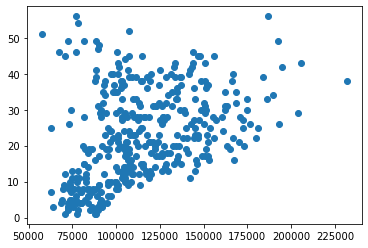

In [3]:
lm_0 = smf.ols(formula="salary ~ years_post_phd", data = salaries_df).fit()
print(lm_0.summary())
plt.figure()
plt.scatter(salaries_df.salary, salaries_df.years_post_phd)
plt.show()

If we colour these points based on the professors' ranks a very different pattern emerges

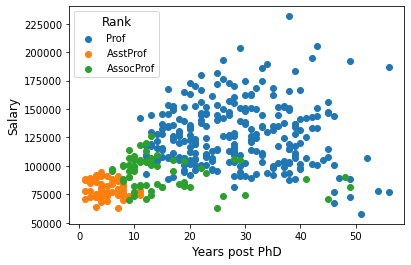

In [4]:
jobs = salaries_df["job"].unique()

    
plt.figure()
for job in jobs:
    tmp = salaries_df[salaries_df["job"] == job]
    plt.scatter(tmp.years_post_phd, tmp.salary, label = job)
plt.legend(title = "Rank", title_fontsize = "large")
plt.xlabel("Years post PhD", fontsize="large")
plt.ylabel("Salary", fontsize="large")
plt.show()

### Question

What assumption of the variance component model clearly does not hold for this data set?

# Simulation

Before we analyse this data we should familiarise ourselves with the functionality provided by `statsmodels`. To have a data set where we know the "true" values we will simulate a very similar dataset.

In [6]:
demo_job = np.repeat(a=['Prof', 'AsstProf', 'AssocProf'], repeats=100)
demo_ypp = np.concatenate(
    (stats.poisson.rvs(30, size = 100),
    stats.poisson.rvs(5, size = 100),
    stats.poisson.rvs(15, size = 100)))

demo_salary_means = [126772,80775,93876]
demo_salary_scale = 15000
demo_salary = stats.norm.rvs(loc = np.repeat(a=demo_salary_means, repeats=100), scale = demo_salary_scale, size = 300)

demo_df = pd.DataFrame({'job': demo_job,
                      'years_post_phd': demo_ypp,
                       'salary': demo_salary})
demo_df = smt.add_constant(demo_df)

jobs = demo_df["job"].unique()

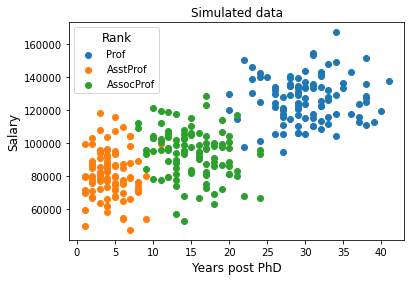

In [7]:
plt.figure()
for job in jobs:
    tmp = demo_df[demo_df["job"] == job]
    plt.scatter(tmp.years_post_phd, tmp.salary, label = job)
plt.title("Simulated data")
plt.legend(title = "Rank", title_fontsize = "large")
plt.xlabel("Years post PhD", fontsize="large")
plt.ylabel("Salary", fontsize="large")
plt.show()

### Question

As a way to get a rough idea of the components of the variance, estimate the variance among the known means and use it to compute the variance partition coefficient (VPC) for the simulated dataset. Obviously since we are estimating the variance based on a data set of size 3 we should not put too much faith in the results.

To do MLM we need some additional libraries. The `MixedLM` class ([link](https://www.statsmodels.org/stable/generated/statsmodels.regression.mixed_linear_model.MixedLM.html#statsmodels.regression.mixed_linear_model.MixedLM)) is the one we will be interested in.

In [9]:
import statsmodels.regression.mixed_linear_model as mlm

### Question

Write down a way to describe the salaries with a variance components model. What parameters will be estimated?

### Question

The following cell fits this model to the data. What are the estimated parameter values?

Hint: Due to an odd choice of names, the "Scale" parameter in the summary is the individual level variance.

In [10]:
mlm_0 = mlm.MixedLM(endog = demo_df.salary, exog = demo_df[["const"]], groups = demo_df.job).fit()
mlm_0.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
==================================================================
Model:              MixedLM   Dependent Variable:   salary        
No. Observations:   300       Method:               REML          
No. Groups:         3         Scale:                204305624.3905
Min. group size:    100       Log-Likelihood:       -3293.4138    
Max. group size:    100       Converged:            Yes           
Mean group size:    100.0                                         
------------------------------------------------------------------
              Coef.      Std.Err.   z   P>|z|   [0.025    0.975]  
------------------------------------------------------------------
const        100587.861 13555.156 7.421 0.000 74020.244 127155.478
Group Var 549183677.025 38655.470                                 
==================================================================

"""

### Question

Does this look reasonable?

### Question

Compute the VPC from the model fit. Does it agree with the previous estimate?

### Question

Test whether including the effects of job is important in this model.

### Question 

Fit the model including the `years_post_phd` as a covariate. Does this parameter have a significant association?

### Question

Apply the methodology above to establish if `years_post_phd` has a significant association with a Professor's salary while adjusting for random job-specific effects.

### Question

How much of the variance is explained by the professors rank?